In [9]:
import os
import sys
import json
import pprint #pretty print
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print sys.version
print "Pandas: ",pd.version.version
from __future__ import division
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import preprocessing

#np.random.seed(125)

2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Pandas:  0.16.2


In [10]:
bank_telemarket_df=pd.read_csv("C:/Users/xtl476/BigDataAcadBootCamp/Metis/Metis_Project_2/data/bank/bank.csv",sep=';')

In [11]:
#Change the name of the y column to Response
bank_telemarket_df=bank_telemarket_df.rename(columns = {'y':'Response'})

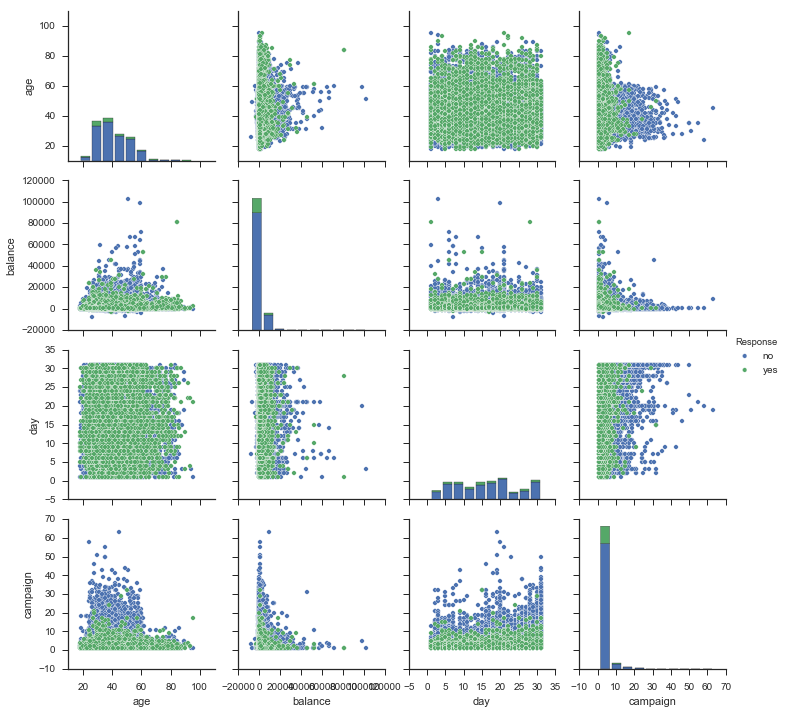

In [12]:
#Create Pair Plots to assess Interactions

import seaborn as sns; sns.set(style="ticks", color_codes=True)
bank_pairplot_df=bank_telemarket_df[['age','balance','day','campaign','Response']]
sns.pairplot(bank_pairplot_df,hue='Response')

In [13]:
####################################################################################
#Data Type and Sanity Checks
####################################################################################
#Check for null values in movies dataframe
print "Number of rows which are Null by Column Names:\n"
print "\n",len(bank_telemarket_df.index)-bank_telemarket_df.count(),"\n"

Number of rows which are Null by Column Names:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Response     0
dtype: int64 



In [ ]:
def balance_group(row):
    if row['balance'] < 0:
        return 'negative balance'
    elif row['balance'] <= 2500:
        return 'le_2500_balance'
    elif row['balance'] >2500:
        return 'gt_2500_balance'

bank_telemarket_df['balance_group'] = bank_telemarket_df.apply(lambda row: balance_group(row), axis=1)

In [49]:
def age_group(row):
    if 18  <= row['age'] <= 24:
        return 'age_18_24'
    elif 25 <= row['age'] <= 34:
        return 'age_25_34'
    elif row['age'] <= 50:
        return 'age_35_50'
    elif row['age'] > 51:
        return 'age_gt_51'
    
bank_telemarket_df['age_group'] = bank_telemarket_df.apply (lambda row: age_group(row),axis=1)

In [35]:
def campaign_group(row):
    if row['campaign'] < 0:
        return 'Negative_campaign'
    if row['campaign'] == 0:
        return '0_contacts_campaign'
    if row['campaign'] == 1:
        return '1_contact_campaign'
    elif row['campaign'] == 2:
        return '2_contacts_campaign'
    elif row['campaign'] > 2:
        return 'gt_2_contacts_campaign'

bank_telemarket_df['campaign_group'] = bank_telemarket_df.apply(lambda row: campaign_group(row), axis = 1)

In [70]:
def pdays_group(row):
#    if row['pdays'] == -1:
#        return 'no_previous_contact'
#    else:
#        return 'contacted_before'
    if row['pdays'] == -1:
        return 'no_previous_contact'
    if row['pdays'] <=200:
        return 'contacted_last_200_days'
    elif row['pdays'] >200:
        return 'not_contacted_last_200_days'
bank_telemarket_df['pdays_group'] = bank_telemarket_df.apply(lambda row: pdays_group(row), axis = 1)

In [71]:
print pd.crosstab(bank_telemarket_df.Response, [bank_telemarket_df['balance_group']] ,
                                         rownames=['Response'], colnames=['balance_group'])

balance_group  gt_2500_balance  le_2500_balance  negative balance
Response                                                         
no                        5721            30645              3556
yes                       1154             3925               210


In [96]:
print pd.crosstab(bank_telemarket_df.balance_group, [bank_telemarket_df['default']] ,
                                         rownames=['balance_group'], colnames=['default'])

default              no  yes
balance_group               
gt_2500_balance    6872    3
le_2500_balance   34198  372
negative balance   3326  440


In [72]:
print pd.crosstab(bank_telemarket_df.Response, [bank_telemarket_df['campaign_group']] ,
                                         rownames=['Response'], colnames=['campaign_group'])

campaign_group  1_contact_campaign  2_contacts_campaign  \
Response                                                  
no                           14983                11104   
yes                           2561                 1401   

campaign_group  gt_2_contacts_campaign  
Response                                
no                               13835  
yes                               1327  


In [92]:
pd.crosstab(bank_telemarket_df.Response, [bank_telemarket_df.job, bank_telemarket_df.housing],
         rownames=['Response'], colnames=['job', 'housing'])

job      admin.       blue-collar       entrepreneur      housemaid       \
housing      no   yes          no   yes           no  yes        no  yes   
Response                                                                   
no         1645  2895        2411  6613          548  816       757  374   
yes         344   287         273   435           70   53        85   24   

job      management       ... services       student      technician        \
housing          no   yes ...       no   yes      no  yes         no   yes   
Response                  ...                                                
no             3910  4247 ...     1204  2581     442  227       2978  3779   
yes             870   431 ...      184   185     247   22        504   336   

job      unemployed      unknown      
housing          no  yes      no yes  
Response                              
no              598  503     230  24  
yes             162   40      32   2  

[2 rows x 24 columns]

In [73]:
print pd.crosstab(bank_telemarket_df.Response, [bank_telemarket_df['age_group']] ,
                                         rownames=['Response'], colnames=['age_group'])

age_group  age_18_24  age_25_34  age_35_50  age_gt_51
Response                                             
no               602      12431      18947       7083
yes              207       1773       1996       1236


In [74]:
print pd.crosstab(bank_telemarket_df.Response, [bank_telemarket_df['pdays_group']] ,
                                         rownames=['Response'], colnames=['pdays_group'])

pdays_group  contacted_last_200_days  no_previous_contact  \
Response                                                    
no                              2936                33570   
yes                             1367                 3384   

pdays_group  not_contacted_last_200_days  
Response                                  
no                                  3416  
yes                                  538  


In [51]:
bank_telemarket_df['Response_0_1']=bank_telemarket_df['Response'].replace(['yes','no'], [1,0], inplace=False)

#bank_telemarket_df['Response'].replace(['yes','no'], [1,0], inplace=True)

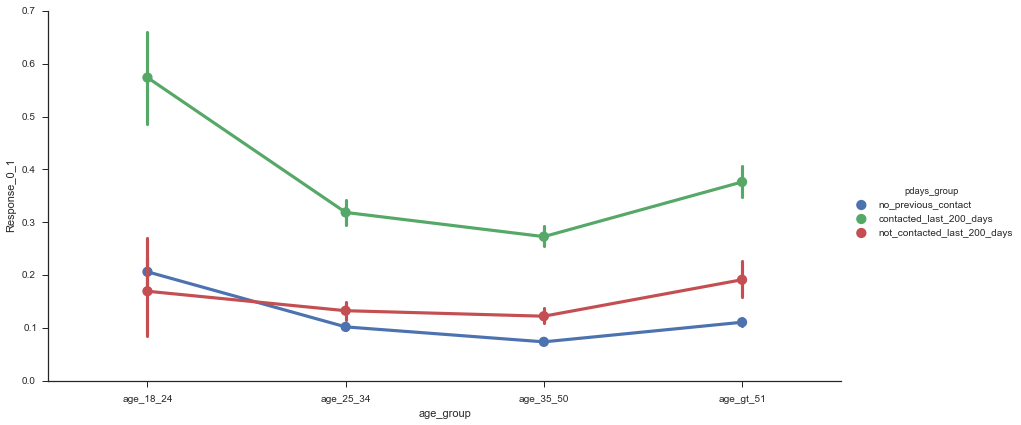

In [84]:
ax = sns.factorplot(x='age_group',y='Response_0_1',hue="pdays_group",data=bank_telemarket_df.sort('age_group'),estimator=np.mean,size=6,aspect=2)

In [76]:
print pd.crosstab(bank_telemarket_df.age_group, [bank_telemarket_df['pdays_group']] ,
                                         rownames=['age_group'], colnames=['pdays_group'])

pdays_group  contacted_last_200_days  no_previous_contact  \
age_group                                                   
age_18_24                        115                  635   
age_25_34                       1296                11506   
age_35_50                       1803                17226   
age_gt_51                       1023                 6768   

pdays_group  not_contacted_last_200_days  
age_group                                 
age_18_24                             59  
age_25_34                           1402  
age_35_50                           1914  
age_gt_51                            528  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000330BA3C8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000330D6E10>], dtype=object)

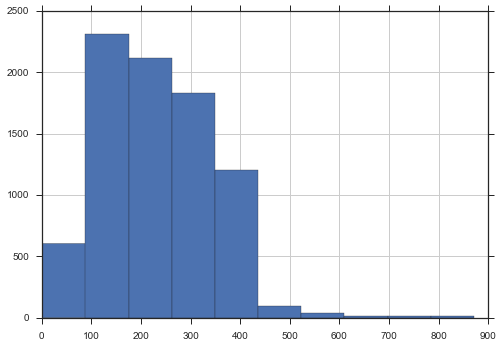

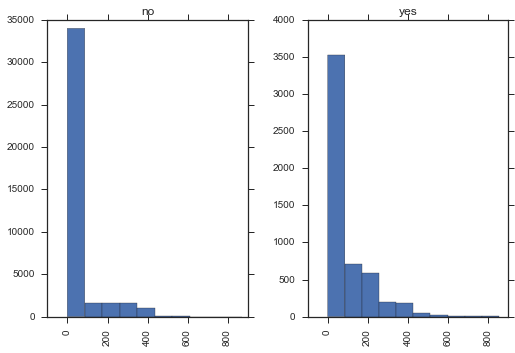

In [83]:
pd.Series((bank_telemarket_df.pdays[bank_telemarket_df.pdays>0])).hist(bins=10)

bank_telemarket_df[['Response','pdays']].hist(stacked=True, by='Response')

In [14]:
#Add Dummies Column for default
dummies_default = pd.get_dummies(bank_telemarket_df['default'])
bank_telemarket_df = pd.concat([bank_telemarket_df,dummies_default],axis=1)
bank_telemarket_df=bank_telemarket_df.rename(columns = {'yes':'Default_yes'})
bank_telemarket_df=bank_telemarket_df.rename(columns = {'no':'Default_no'})
